In [ ]:
!pip install pmdarima

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from pmdarima.arima.utils import ndiffs

In [6]:
px

<module 'plotly.express' from '/usr/local/lib/python3.7/dist-packages/plotly/express/__init__.py'>

In [7]:
covid_confirmed = pd.read_csv("project_dataset.confirmed_reduce.csv")

In [8]:
covid_death = pd.read_csv("project_dataset_death_reduce.csv")

In [9]:
covid_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",4239,4268,4305,4336,4546,4645,4705,4770,4847,4879,4902,4970,4998,5075,5103,5154,5184,5198,5227,5257,5270,5327,5358,5376,5407,5440,5499,5554,5596,...,6897,6904,6907,6909,6910,6910,6914,6914,6918,6918,6920,6920,6926,6928,6938,6971,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142,7142,7142,7150,7161,7172,7186,7186,7186,7206
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",13823,13955,14064,14187,14440,14656,14845,15052,15202,15327,15417,15572,15701,15841,16002,16176,16251,16346,16513,16653,16798,16981,17128,17256,17333,17496,17629,17779,17922,...,20921,20941,20966,20983,20993,20993,21035,21093,21107,21123,21131,21135,21154,21170,21191,21290,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620,21620,21620,21661,21674,21684,21698,21698,21698,21724
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1517,1528,1530,1533,1575,1597,1614,1634,1648,1658,1663,1679,1685,1696,1712,1723,1729,1730,1738,1760,1778,1793,1805,1827,1834,1882,1898,1920,1931,...,2299,2300,2302,2302,2302,2302,2307,2307,2307,2307,2308,2308,2310,2314,2317,2319,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334,2334,2334,2337,2340,2343,2342,2342,2342,2343
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1854,1863,1882,1885,1923,1944,1981,2015,2038,2051,2060,2090,2109,2113,2130,2144,2151,2162,2170,2188,2198,2212,2223,2223,2229,2247,2261,2271,2284,...,2593,2594,2596,2596,2597,2597,2604,2604,2604,2605,2607,2607,2609,2612,2615,2630,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664,2664,2664,2665,2665,2665,2666,2666,2666,2667
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",4693,4729,4746,4771,4849,4898,4957,5018,5047,5066,5080,5134,5170,5219,5264,5292,5304,5308,5320,5376,5411,5439,5462,5473,5485,5517,5568,5612,5655,...,6607,6613,6616,6619,6621,6621,6635,6645,6651,6656,6660,6661,6678,6680,6694,6750,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864,6864,6864,6887,6889,6894,6906,6906,6906,6916


In [10]:
covid_death.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,50,50,50,50,50,50,50,50,53,54,55,55,55,55,55,55,55,55,55,55,61,61,62,62,62,65,67,69,...,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,110,110,110,110,110,110,110,110,110,110,111,111,111,112,112,112,113
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,169,169,169,169,169,171,171,171,173,173,173,175,175,177,179,182,182,182,183,184,188,188,189,189,189,216,217,225,...,305,305,306,306,306,306,307,307,307,308,308,308,308,309,309,309,310,310,310,310,310,310,310,310,310,310,310,310,310,311,311,311,311,311,311,312,312,312,312,312
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,33,33,33,33,33,35,35,35,35,35,35,35,35,36,36,36,36,36,36,36,36,37,38,38,38,40,40,40,...,56,56,56,56,56,56,56,57,57,57,57,57,57,56,56,56,56,56,56,56,56,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,46,46,46,46,46,48,48,48,48,48,48,48,48,47,47,47,47,47,47,47,48,48,48,48,48,51,51,51,...,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,63,63,63,63,63,67,72,75,77,77,77,79,80,80,83,83,83,83,83,83,86,86,86,86,86,94,95,98,...,135,135,135,135,135,135,136,136,137,137,137,137,137,137,137,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139


In [11]:
# we will drop the column dont we dont need for the analysis: for this project the column of interest are the Province_ state, date of confirmed case
covid_confirmed = covid_confirmed.drop(columns= ['UID',	'iso2',	'iso3',	'code3',	'FIPS',	'Admin2', 'Country_Region', 'Lat',	'Long_',	'Combined_Key'])

In [12]:
covid_confirmed

,Province_State,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,Alabama,4239,4268,4305,4336,4546,4645,4705,4770,4847,4879,4902,4970,4998,5075,5103,5154,5184,5198,5227,5257,5270,5327,5358,5376,5407,5440,5499,5554,5596,5596,5669,5683,5723,5753,5811,5824,5856,5869,5881,...,6897,6904,6907,6909,6910,6910,6914,6914,6918,6918,6920,6920,6926,6928,6938,6971,7001,7005,7010,7015,7017,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142,7142,7142,7150,7161,7172,7186,7186,7186,7206
1,Alabama,13823,13955,14064,14187,14440,14656,14845,15052,15202,15327,15417,15572,15701,15841,16002,16176,16251,16346,16513,16653,16798,16981,17128,17256,17333,17496,17629,17779,17922,17922,18126,18211,18344,18418,18494,18568,18668,18723,18763,...,20921,20941,20966,20983,20993,20993,21035,21093,21107,21123,21131,21135,21154,21170,21191,21290,21392,21411,21422,21444,21467,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620,21620,21620,21661,21674,21684,21698,21698,21698,21724
2,Alabama,1517,1528,1530,1533,1575,1597,1614,1634,1648,1658,1663,1679,1685,1696,1712,1723,1729,1730,1738,1760,1778,1793,1805,1827,1834,1882,1898,1920,1931,1931,1951,1956,1966,1981,1989,1994,2002,2008,2008,...,2299,2300,2302,2302,2302,2302,2307,2307,2307,2307,2308,2308,2310,2314,2317,2319,2320,2320,2320,2322,2324,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334,2334,2334,2337,2340,2343,2342,2342,2342,2343
3,Alabama,1854,1863,1882,1885,1923,1944,1981,2015,2038,2051,2060,2090,2109,2113,2130,2144,2151,2162,2170,2188,2198,2212,2223,2223,2229,2247,2261,2271,2284,2284,2307,2309,2319,2321,2327,2331,2334,2339,2346,...,2593,2594,2596,2596,2597,2597,2604,2604,2604,2605,2607,2607,2609,2612,2615,2630,2645,2647,2648,2651,2652,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664,2664,2664,2665,2665,2665,2666,2666,2666,2667
4,Alabama,4693,4729,4746,4771,4849,4898,4957,5018,5047,5066,5080,5134,5170,5219,5264,5292,5304,5308,5320,5376,5411,5439,5462,5473,5485,5517,5568,5612,5655,5655,5713,5720,5745,5768,5842,5871,5908,5915,5920,...,6607,6613,6616,6619,6621,6621,6635,6645,6651,6656,6660,6661,6678,6680,6694,6750,6771,6773,6776,6794,6808,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864,6864,6864,6887,6889,6894,6906,6906,6906,6916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,2138,2145,2159,2199,2216,2239,2260,2346,2348,2353,2447,2497,2502,2579,2605,2614,2685,2753,2769,2788,2847,2870,2870,2931,2981,2993,3020,3028,3078,3078,3116,3146,3151,3161,3199,3219,3233,3238,3257,...,3730,3732,3732,3732,3739,3741,3744,3753,3751,3751,3751,3755,3758,3760,3762,3765,3765,3765,3769,3772,3770,3775,3776,3776,3776,3780,3780,3781,3781,3784,3784,3784,3784,3785,3785,3785,3787,3787,3787,3789
3338,Wyoming,1558,1569,1570,1589,1597,1618,1668,1693,1693,1708,1744,1764,1774,1794,1806,1813,1817,1833,1843,1852,1874,1887,1887,1900,1913,1925,1948,1957,1959,1960,1963,1968,1975,1981,1984,1984,1984,1983,1988,...,2181,2183,2183,2183,2195,2204,2209,2211,2217,2217,2217,2229,2232,2234,2237,2239,2239,2239,2244,2249,2250,2251,2246,2246,2246,2252,2261,2263,2264,2266,2266,2266,2266,2272,2279,2287,2289,2289,2289,2290
3339,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,

In [13]:
covid_death = covid_death.drop(columns= ['UID',	'iso2',	'iso3',	'code3',	'FIPS',	'Admin2', 'Country_Region', 'Population', 'Lat',	'Long_',	'Combined_Key'])

In [14]:
covid_death

,Province_State,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,...,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21
0,Alabama,50,50,50,50,50,50,50,50,53,54,55,55,55,55,55,55,55,55,55,55,61,61,62,62,62,65,67,69,69,69,69,69,70,71,74,76,77,77,77,...,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,110,110,110,110,110,110,110,110,110,110,111,111,111,112,112,112,113
1,Alabama,169,169,169,169,169,171,171,171,173,173,173,175,175,177,179,182,182,182,183,184,188,188,189,189,189,216,217,225,224,224,224,224,228,228,233,234,227,227,227,...,305,305,306,306,306,306,307,307,307,308,308,308,308,309,309,309,310,310,310,310,310,310,310,310,310,310,310,310,310,311,311,311,311,311,311,312,312,312,312,312
2,Alabama,33,33,33,33,33,35,35,35,35,35,35,35,35,36,36,36,36,36,36,36,36,37,38,38,38,40,40,40,40,40,40,40,40,42,43,44,45,45,45,...,56,56,56,56,56,56,56,57,57,57,57,57,57,56,56,56,56,56,56,56,56,58,58,58,58,58,58,58,58,59,59,59,59,59,59,59,59,59,59,59
3,Alabama,46,46,46,46,46,48,48,48,48,48,48,48,48,47,47,47,47,47,47,47,48,48,48,48,48,51,51,51,51,51,52,52,52,52,52,52,53,53,53,...,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
4,Alabama,63,63,63,63,63,67,72,75,77,77,77,79,80,80,83,83,83,83,83,83,86,86,86,86,86,94,95,98,98,98,100,100,101,105,109,111,112,112,112,...,135,135,135,135,135,135,136,136,137,137,137,137,137,137,137,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,7,7,7,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3338,Wyoming,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,9,9,10,10,10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
3339,Wyoming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
3340,Wyoming,19,19,19,19,21,21,21,21,21,21,21,23,23,23,23,23,23,23,24,24,24,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [15]:
#It is not to pratical to have date as column instead we want them as row in their commun column name called Date
# we will merged all the row from the same Province, aggregate them , sum them and we will finally tranpose the data frame
covid_confirmed = covid_confirmed.groupby(by='Province_State').aggregate(np.sum).T
covid_death = covid_death.groupby(by='Province_State').aggregate(np.sum).T

In [16]:
covid_confirmed.head()


Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/1/21,365747,47019,0,530267,229442,2365024,337161,185708,58064,49,29252,1323315,677589,103,7326,22397,141077,963389,517773,282980,230108,265261,315275,24902,280219,375178,528621,415302,218386,445019,81555,167716,227046,45932,535043,144142,995816,539545,92770,122,700380,291209,113909,653260,77054,87949,307507,99164,586802,1782956,276612,7412,2036,354766,246752,87820,522523,44409
1/2/21,369458,47821,0,539150,231442,2415246,339172,190120,58873,49,29509,1354833,685122,103,7326,22448,142199,975352,523090,283895,230119,273970,315275,25245,283171,384181,538121,417832,220277,448387,81944,168262,228871,46614,541202,145379,1011665,558437,92891,122,714673,296343,116348,661901,77932,87949,312718,99829,604132,1801181,281654,7689,2041,358755,246752,89327,523652,44573
1/3/21,371934,48118,0,556384,233475,2452262,341250,190120,59484,49,29764,1365436,690900,103,7326,22560,142507,979821,526071,284715,230119,276825,321058,25592,285319,387662,538121,420544,222061,451605,82381,169000,231614,47376,545450,146394,1023897,564924,93041,122,721481,304375,117745,666341,78169,87949,321669,100532,608297,1816886,283473,7793,2042,363765,255396,91058,526245,44875
1/4/21,374095,48382,0,561542,234781,2490518,343435,194636,60333,49,29904,1376692,696063,103,7344,22602,143305,984880,529688,286356,234069,279142,322181,25967,287802,392568,543611,423688,223677,454015,82664,169585,233032,47870,547247,147315,1035139,570111,93240,122,727423,307091,118453,671190,78805,92708,325472,100643,612250,1831146,285633,7873,2055,367536,256435,91886,527871,45257
1/5/21,379593,48582,0,567474,238888,2529480,346893,196968,61100,49,30166,1392123,706154,103,7357,22757,144843,991719,533083,288298,233901,280835,326648,26565,289758,397202,546642,425261,225444,458230,83378,171033,235455,48662,554400,148499,1048281,575396,93494,122,735003,308600,119488,680080,79319,93852,328073,101076,617649,1864173,288951,8038,2083,371913,258767,93162,531890,45569


In [17]:
covid_death.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/1/21,4872,206,0,9015,3711,26504,4873,5995,1065,0,788,21673,10958,3,122,289,1436,17978,9468,3898,2892,2623,7488,352,5942,12423,13018,5382,4816,5747,961,1668,3143,759,19160,2502,38155,6748,1316,2,13728,2489,1477,16245,1521,1944,5296,1488,6907,28359,1269,136,23,5081,3461,1361,5254,438
1/2/21,4872,215,0,9061,3729,26696,4912,6099,1072,0,792,21890,10960,3,122,289,1448,18217,9562,3946,2893,2698,7488,358,5967,12502,13306,5436,4840,5751,971,1669,3148,769,19187,2534,38273,6892,1317,2,13880,2527,1492,16273,1526,1957,5385,1501,6970,28442,1294,139,23,5117,3461,1373,5256,438
1/3/21,4873,215,0,9061,3749,26788,4934,6099,1080,0,794,21987,10964,3,122,289,1448,18322,9625,3946,2893,2723,7537,359,5994,12610,13306,5489,4871,5770,972,1672,3180,780,19208,2551,38415,6910,1317,2,14014,2547,1500,16331,1545,1974,5469,1513,7025,28496,1301,140,23,5124,3459,1376,5261,438
1/4/21,4878,218,0,9064,3800,27160,4944,6168,1085,0,797,22090,10971,3,122,289,1459,18412,9735,3992,2911,2749,7585,361,6027,12671,13391,5502,4884,5772,975,1682,3206,781,19225,2574,38599,6941,1319,2,14178,2552,1506,16432,1555,1992,5484,1513,7168,28570,1305,144,24,5132,3482,1396,5269,438
1/5/21,4886,218,0,9317,3836,27684,4991,6192,1093,0,801,22188,11072,3,123,289,1471,18562,9800,3999,3006,2772,7635,369,6082,12734,13608,5520,4975,5987,1005,1692,3235,792,19382,2594,38743,6996,1336,2,14313,2571,1550,16631,1562,2005,5498,1513,7267,28808,1312,149,24,5191,3541,1442,5366,464


In [18]:
covid_confirmed.index.name= "Date"
covid_confirmed = covid_confirmed.reset_index()
covid_death.index.name= "Date"
covid_death = covid_death.reset_index()

In [19]:
covid_death.tail()

Province_State,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
153,6/3/21,11188,369,0,17653,5842,63345,6603,8245,1668,0,1136,36973,20900,3,139,501,2101,25265,13657,6065,5081,7077,10605,837,9626,17893,20485,7530,7324,9544,1627,2249,5599,1354,26253,4273,53357,13130,1546,2,19980,7316,2683,27295,2515,2715,9739,2020,12472,51633,2308,255,28,11216,5821,2807,7923,720
154,6/4/21,11198,369,0,17673,5845,63401,6611,8246,1674,0,1136,36973,20942,3,139,501,2101,25282,13661,6067,5085,7086,10615,838,9630,17903,20511,7538,7325,9554,1632,2249,5600,1355,26265,4280,53416,13151,1546,2,19980,7316,2686,27325,2516,2717,9744,2022,12476,51676,2311,256,28,11222,5836,2813,7954,720
155,6/5/21,11198,369,0,17698,5846,63441,6613,8246,1677,0,1136,36973,20986,3,139,502,2101,25314,13685,6068,5085,7091,10615,839,9639,17907,20588,7554,7325,9558,1632,2249,5600,1355,26273,4280,53429,13151,1547,2,19980,7316,2691,27343,2518,2717,9752,2022,12476,51701,2311,256,28,11229,5836,2813,7954,720
156,6/6/21,11198,369,0,17700,5846,63557,6613,8246,1677,0,1136,36973,20986,3,139,505,2101,25352,13685,6072,5085,7091,10615,839,9645,17911,20588,7558,7325,9557,1632,2249,5600,1355,26279,4280,53462,13151,1547,2,19980,7316,2694,27348,2519,2717,9754,2022,12476,51719,2311,256,28,11236,5836,2813,7954,720
157,6/7/21,11217,369,0,17700,5849,63580,6625,8253,1677,0,1136,36973,20986,3,139,505,2106,25372,13687,6073,5101,7103,10619,839,9649,17915,20600,7560,7333,9560,1633,2251,5607,1357,26285,4286,53472,13199,1547,2,19980,7316,2694,27360,2522,2717,9754,2022,12479,51736,2313,256,28,11245,5856,2821,7965,720


In [20]:
#melt the data frame from a wide to a long format
covid_confirmed_melt = covid_confirmed.melt(id_vars='Date').copy()
covid_confirmed_melt

,Date,Province_State,value
0,1/1/21,Alabama,365747
1,1/2/21,Alabama,369458
2,1/3/21,Alabama,371934
3,1/4/21,Alabama,374095
4,1/5/21,Alabama,379593
...,...,...,...
9159,6/3/21,Wyoming,60549
9160,6/4/21,Wyoming,60628
9161,6/5/21,Wyoming,60628
9162,6/6/21,Wyoming,60628


In [21]:
# rename the column
covid_confirmed_melt.rename(columns={'value': 'Confirmed'}, inplace=True)

In [22]:
covid_confirmed_melt

,Date,Province_State,Confirmed
0,1/1/21,Alabama,365747
1,1/2/21,Alabama,369458
2,1/3/21,Alabama,371934
3,1/4/21,Alabama,374095
4,1/5/21,Alabama,379593
...,...,...,...
9159,6/3/21,Wyoming,60549
9160,6/4/21,Wyoming,60628
9161,6/5/21,Wyoming,60628
9162,6/6/21,Wyoming,60628


In [23]:
df_confirmed = covid_confirmed_melt.copy()
df_confirmed

,Date,Province_State,Confirmed
0,1/1/21,Alabama,365747
1,1/2/21,Alabama,369458
2,1/3/21,Alabama,371934
3,1/4/21,Alabama,374095
4,1/5/21,Alabama,379593
...,...,...,...
9159,6/3/21,Wyoming,60549
9160,6/4/21,Wyoming,60628
9161,6/5/21,Wyoming,60628
9162,6/6/21,Wyoming,60628


In [24]:
#The date value are string and we need to convert them to date time
df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'])
df_confirmed.set_index('Date', inplace=True)

In [25]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9164 entries, 2021-01-01 to 2021-06-07
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province_State  9164 non-null   object
 1   Confirmed       9164 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 214.8+ KB


In [26]:
# Confirmed column is cumulative and we want them to be in a daily basis
df_confirmed['Daily_confirmed'] = df_confirmed.groupby(['Province_State'])['Confirmed'].diff()

In [27]:
df_confirmed

,Province_State,Confirmed,Daily_confirmed
Date,,,
2021-01-01,Alabama,365747,NaN
2021-01-02,Alabama,369458,3711.0
2021-01-03,Alabama,371934,2476.0
2021-01-04,Alabama,374095,2161.0
2021-01-05,Alabama,379593,5498.0
...,...,...,...
2021-06-03,Wyoming,60549,102.0
2021-06-04,Wyoming,60628,79.0
2021-06-05,Wyoming,60628,0.0


In [28]:
df_confirmed.dropna()

,Province_State,Confirmed,Daily_confirmed
Date,,,
2021-01-02,Alabama,369458,3711.0
2021-01-03,Alabama,371934,2476.0
2021-01-04,Alabama,374095,2161.0
2021-01-05,Alabama,379593,5498.0
2021-01-06,Alabama,384184,4591.0
...,...,...,...
2021-06-03,Wyoming,60549,102.0
2021-06-04,Wyoming,60628,79.0
2021-06-05,Wyoming,60628,0.0


In [29]:
# As we want to analyse the covid-19 US we will drop the province_state column and group the confirmed case by date.
df_conf = df_confirmed.drop(columns= ['Province_State'])

In [30]:
df_conf

,Confirmed,Daily_confirmed
Date,,
2021-01-01,365747,NaN
2021-01-02,369458,3711.0
2021-01-03,371934,2476.0
2021-01-04,374095,2161.0
2021-01-05,379593,5498.0
...,...,...
2021-06-03,60549,102.0
2021-06-04,60628,79.0
2021-06-05,60628,0.0


In [31]:
df_conf.isnull().sum()

Confirmed           0
Daily_confirmed    58
dtype: int64

In [32]:
df_conf.dropna()

,Confirmed,Daily_confirmed
Date,,
2021-01-02,369458,3711.0
2021-01-03,371934,2476.0
2021-01-04,374095,2161.0
2021-01-05,379593,5498.0
2021-01-06,384184,4591.0
...,...,...
2021-06-03,60549,102.0
2021-06-04,60628,79.0
2021-06-05,60628,0.0


In [33]:
df_conf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9164 entries, 2021-01-01 to 2021-06-07
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Confirmed        9164 non-null   int64  
 1   Daily_confirmed  9106 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 534.8 KB


In [34]:
covid_DF = df_conf.groupby(by='Date').aggregate(np.sum)

In [35]:
covid_DF

,Confirmed,Daily_confirmed
Date,,
2021-01-01,20254160,0.0
2021-01-02,20554622,300462.0
2021-01-03,20763475,208853.0
2021-01-04,20947480,184005.0
2021-01-05,21182522,235042.0
...,...,...
2021-06-03,33326437,19074.0
2021-06-04,33343297,16860.0
2021-06-05,33357205,13908.0


In [36]:
covid_df = covid_DF.drop(columns= ['Confirmed'])
covid_df

,Daily_confirmed
Date,
2021-01-01,0.0
2021-01-02,300462.0
2021-01-03,208853.0
2021-01-04,184005.0
2021-01-05,235042.0
...,...
2021-06-03,19074.0
2021-06-04,16860.0
2021-06-05,13908.0


In [37]:
#Covid death data preparation_ I applied the same step as Covid confirmed data frame
covid_death_melt = covid_death.melt(id_vars='Date').copy()
covid_death_melt

,Date,Province_State,value
0,1/1/21,Alabama,4872
1,1/2/21,Alabama,4872
2,1/3/21,Alabama,4873
3,1/4/21,Alabama,4878
4,1/5/21,Alabama,4886
...,...,...,...
9159,6/3/21,Wyoming,720
9160,6/4/21,Wyoming,720
9161,6/5/21,Wyoming,720
9162,6/6/21,Wyoming,720


In [38]:
covid_death_melt.rename(columns={'value': 'Death'}, inplace=True)


In [39]:
df_death = covid_death_melt.copy()
df_death

,Date,Province_State,Death
0,1/1/21,Alabama,4872
1,1/2/21,Alabama,4872
2,1/3/21,Alabama,4873
3,1/4/21,Alabama,4878
4,1/5/21,Alabama,4886
...,...,...,...
9159,6/3/21,Wyoming,720
9160,6/4/21,Wyoming,720
9161,6/5/21,Wyoming,720
9162,6/6/21,Wyoming,720


In [40]:
#1)The date value are string and we need to convert them to date time. 
# 2)Put the date column as an index.
df_death['Date'] = pd.to_datetime(df_death['Date'])
df_death.set_index('Date', inplace=True)

In [41]:
# Death column is comulative and we want them to be in a daily basis
df_death['Daily_death'] = df_death.groupby(['Province_State'])['Death'].diff()

In [42]:
df_death.dropna()

,Province_State,Death,Daily_death
Date,,,
2021-01-02,Alabama,4872,0.0
2021-01-03,Alabama,4873,1.0
2021-01-04,Alabama,4878,5.0
2021-01-05,Alabama,4886,8.0
2021-01-06,Alabama,4994,108.0
...,...,...,...
2021-06-03,Wyoming,720,0.0
2021-06-04,Wyoming,720,0.0
2021-06-05,Wyoming,720,0.0


In [43]:
df_death = df_death.drop(columns= ['Province_State'])

In [44]:
df_death.dropna()

,Death,Daily_death
Date,,
2021-01-02,4872,0.0
2021-01-03,4873,1.0
2021-01-04,4878,5.0
2021-01-05,4886,8.0
2021-01-06,4994,108.0
...,...,...
2021-06-03,720,0.0
2021-06-04,720,0.0
2021-06-05,720,0.0


In [45]:
covid_D = df_death.groupby(by='Date').aggregate(np.sum)
covid_D

,Death,Daily_death
Date,,
2021-01-01,354428,0.0
2021-01-02,356940,2512.0
2021-01-03,358394,1454.0
2021-01-04,360484,2090.0
2021-01-05,364197,3713.0
...,...,...
2021-06-03,596491,601.0
2021-06-04,597001,510.0
2021-06-05,597377,376.0


In [46]:
covid_d = covid_D.drop(columns= ['Death'])
covid_d

,Daily_death
Date,
2021-01-01,0.0
2021-01-02,2512.0
2021-01-03,1454.0
2021-01-04,2090.0
2021-01-05,3713.0
...,...
2021-06-03,601.0
2021-06-04,510.0
2021-06-05,376.0


In [47]:
Covid_merge = covid_df.merge(right=covid_d, how= 'left', on=['Date'])

In [48]:
Covid_merge

,Daily_confirmed,Daily_death
Date,,
2021-01-01,0.0,0.0
2021-01-02,300462.0,2512.0
2021-01-03,208853.0,1454.0
2021-01-04,184005.0,2090.0
2021-01-05,235042.0,3713.0
...,...,...
2021-06-03,19074.0,601.0
2021-06-04,16860.0,510.0
2021-06-05,13908.0,376.0


In [49]:
#deleting the first row
Covid_merg = Covid_merge.drop(Covid_merge.index[0])
#Covid_merg = Covid_merge.drop([0], axis=0).head()

In [50]:
Covid_merg

,Daily_confirmed,Daily_death
Date,,
2021-01-02,300462.0,2512.0
2021-01-03,208853.0,1454.0
2021-01-04,184005.0,2090.0
2021-01-05,235042.0,3713.0
2021-01-06,255637.0,3906.0
...,...,...
2021-06-03,19074.0,601.0
2021-06-04,16860.0,510.0
2021-06-05,13908.0,376.0


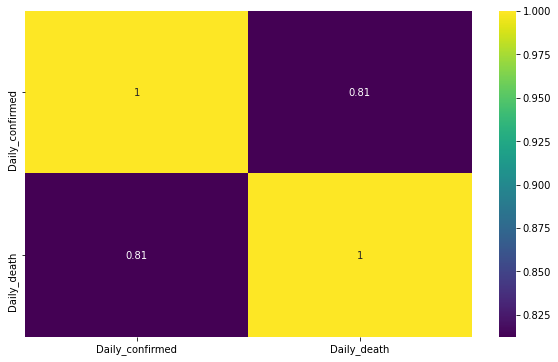

In [51]:
# plot the heatmap to check for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(Covid_merg.corr(), annot=True, cmap='viridis')

In [52]:
Covid_merg.shape #covid_confirmed_melt.plot()

(157, 2)

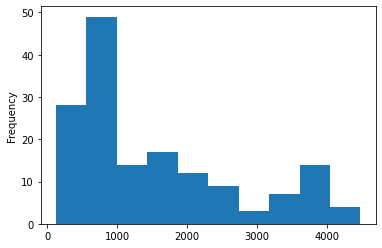

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



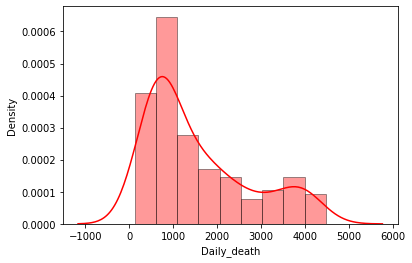

In [53]:
#histogram
Covid_merg['Daily_death'].plot.hist()
plt.show()
#density plot
sns.distplot(a=Covid_merg.Daily_death, color='red', hist_kws={"edgecolor":'black'})
plt.show()

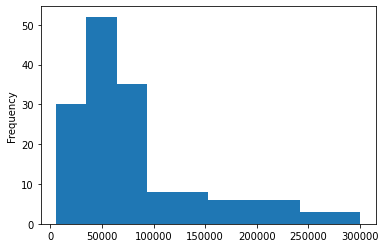

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



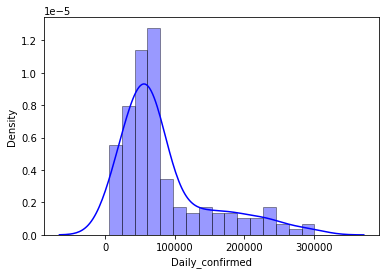

In [54]:
#histogram
Covid_merg['Daily_confirmed'].plot.hist()
plt.show()
# density plot
sns.distplot(a=Covid_merg.Daily_confirmed, color='blue', hist_kws={"edgecolor":'black'})
plt.show()


In [57]:
Covid_merg['Daily_death'].describe()

count     157.000000
mean     1551.108280
std      1180.441256
min       126.000000
25%       683.000000
50%      1023.000000
75%      2107.000000
max      4477.000000
Name: Daily_death, dtype: float64

In [58]:
Covid_merg['Daily_confirmed'].describe()

count       157.000000
mean      83591.949045
std       65013.092013
min        5395.000000
25%       43220.000000
50%       62498.000000
75%       95250.000000
max      300462.000000
Name: Daily_confirmed, dtype: float64

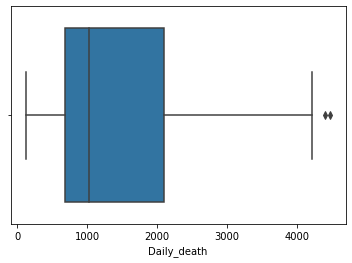

In [59]:
# plot the boxplot to check for outlier
sns.boxplot(x= Covid_merg.Daily_death)

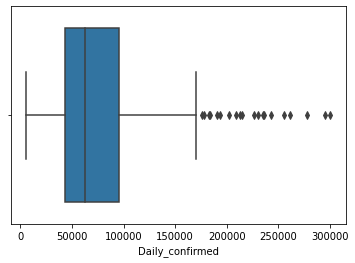

In [60]:
sns.boxplot(x= Covid_merg.Daily_confirmed)

***#checking stationarity with  ADF (Augmented Dickey Fuller Statistical ) test***

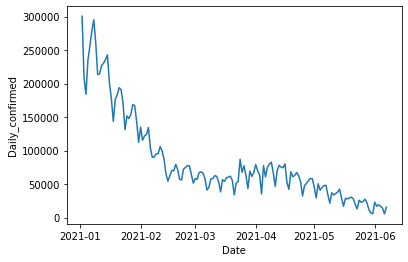

In [61]:
#plot graph (Daily confirmed cases)
plt.xlabel('Date')
plt.ylabel('Daily_confirmed')
plt.plot(Covid_merg.Daily_confirmed)

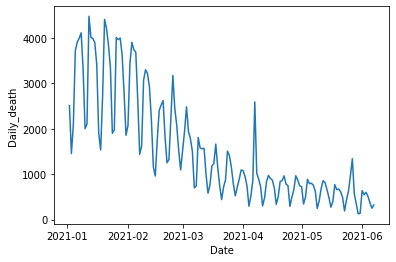

In [63]:
#plot graph (Daily death cases)
plt.xlabel('Date')
plt.ylabel('Daily_death')
plt.plot(Covid_merg.Daily_death)

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
# Ho: Null hypothesis " time series is non stationary"
# H1 time series is stationary 
def adfuller_test(Covid_merg):
  result = adfuller(Covid_merg)
  labels = ['ADF Test statistic','p-value', '#Lags Used','Number of Observations used for ADF']
  for value, label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
      print('strong evidence against the null hypothesis(Ho), reject Ho: the data does not have a unit root and is stationary ')
  else:
      print ('weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary')


In [57]:
adfuller_test(Covid_merg['Daily_confirmed'])

ADF Test statistic : -2.553206316787137
p-value : 0.10305928414333443
#Lags Used : 14
Number of Observations used for ADF : 142
weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary


In [69]:
adfuller_test(Covid_merg['Daily_death'])

ADF Test statistic : -2.0481070303643145
p-value : 0.26588602204047895
#Lags Used : 13
Number of Observations used for ADF : 143
weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary


In [59]:
# To make it stationary we will apply the differencing. y(t)= y(t)-y(t-n)
#first difference
Covid_merg['Daily First Difference'] = Covid_merg['Daily_confirmed'] - Covid_merg['Daily_confirmed'].shift(1)
Covid_merg.head()

,Daily_confirmed,Daily_death,Daily First Difference
Date,,,
2021-01-02,300462.0,2512.0,NaN
2021-01-03,208853.0,1454.0,-91609.0
2021-01-04,184005.0,2090.0,-24848.0
2021-01-05,235042.0,3713.0,51037.0
2021-01-06,255637.0,3906.0,20595.0


In [60]:
confirmed_stat = Covid_merg.drop(columns= ['Daily_death', 'Daily First Difference'])
confirmed_stat                            

,Daily_confirmed
Date,
2021-01-02,300462.0
2021-01-03,208853.0
2021-01-04,184005.0
2021-01-05,235042.0
2021-01-06,255637.0
...,...
2021-06-03,19074.0
2021-06-04,16860.0
2021-06-05,13908.0


In [68]:
confirmed_stat['Daily First Difference'] = confirmed_stat['Daily_confirmed'] - confirmed_stat['Daily_confirmed'].shift(1)
confirmed_stat.head()

,Daily_confirmed,Daily First Difference
Date,,
2021-01-02,300462.0,NaN
2021-01-03,208853.0,-91609.0
2021-01-04,184005.0,-24848.0
2021-01-05,235042.0,51037.0
2021-01-06,255637.0,20595.0


In [69]:
adfuller_test(confirmed_stat['Daily First Difference'].dropna())

ADF Test statistic : -2.084242603082722
p-value : 0.2508977518233335
#Lags Used : 14
Number of Observations used for ADF : 141
weak evidence against the null hypothesis(Ho), fail to reject Ho: the data has a root and is non stationary


In [73]:
#appliying 2nd differencing
Covid_merg['Daily 2nd  Difference'] = Covid_merg['Daily First Difference'] - Covid_merg['Daily First Difference'].shift(1)
Covid_merg.head()

,Daily_confirmed,Daily_death,Daily First Difference,Daily 2nd Difference
Date,,,,
2021-01-02,300462.0,2512.0,NaN,NaN
2021-01-03,208853.0,1454.0,-91609.0,NaN
2021-01-04,184005.0,2090.0,-24848.0,66761.0
2021-01-05,235042.0,3713.0,51037.0,75885.0
2021-01-06,255637.0,3906.0,20595.0,-30442.0


In [74]:
adfuller_test(Covid_merg['Daily 2nd  Difference'].dropna())

ADF Test statistic : -7.3344134047554554
p-value : 1.1061575072829062e-10
#Lags Used : 13
Number of Observations used for ADF : 141
strong evidence against the null hypothesis(Ho), reject Ho: the data does not have a unit root and is stationary 


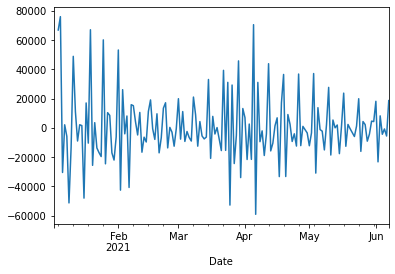

In [75]:
Covid_merg['Daily 2nd  Difference'].plot()

In [76]:
# applying first difference on death
#deleting the first row
Covid_merg_ = Covid_merge.drop(Covid_merge.index[0])

In [77]:
Covid_merg_ = Covid_merg_.drop(columns=['Daily_confirmed'])
Covid_merg_

,Daily_death
Date,
2021-01-02,2512.0
2021-01-03,1454.0
2021-01-04,2090.0
2021-01-05,3713.0
2021-01-06,3906.0
...,...
2021-06-03,601.0
2021-06-04,510.0
2021-06-05,376.0


In [78]:
# first difference
diff = Covid_merg_.diff()

In [79]:
diff

,Daily_death
Date,
2021-01-02,NaN
2021-01-03,-1058.0
2021-01-04,636.0
2021-01-05,1623.0
2021-01-06,193.0
...,...
2021-06-03,53.0
2021-06-04,-91.0
2021-06-05,-134.0


In [80]:
adfuller_test(diff['Daily_death'].dropna())

ADF Test statistic : -4.693058067474913
p-value : 8.671627414758273e-05
#Lags Used : 13
Number of Observations used for ADF : 142
strong evidence against the null hypothesis(Ho), reject Ho: the data does not have a unit root and is stationary 


# Model analysis Daily confirmed cases

1) *Arima*

In [81]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
%matplotlib inline

In [82]:
Covid_stat = Covid_merg.drop(columns=['Daily_confirmed',	'Daily_death',	'Daily First Difference'])
Covid_stat = Covid_stat.dropna()

In [83]:
Covid_stat

,Daily 2nd Difference
Date,
2021-01-04,66761.0
2021-01-05,75885.0
2021-01-06,-30442.0
2021-01-07,2105.0
2021-01-08,-5780.0
...,...
2021-06-03,8191.0
2021-06-04,-4375.0
2021-06-05,-738.0


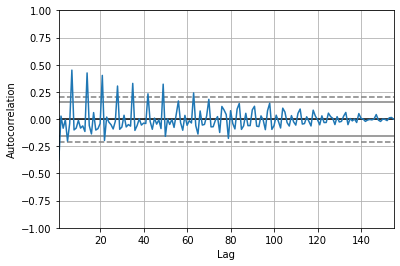

In [84]:
#Autocorrelation analysis
autocorrelation_plot(Covid_stat)
pyplot.show()

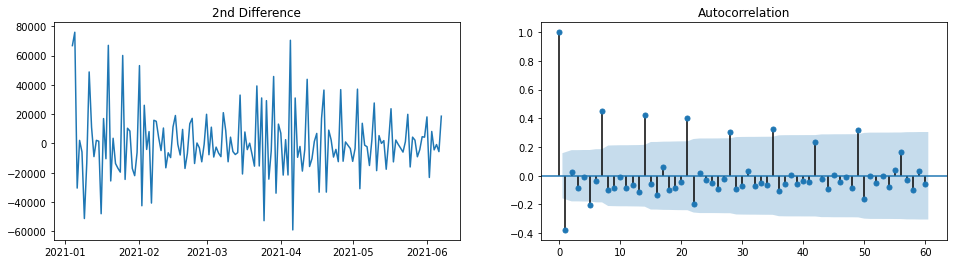

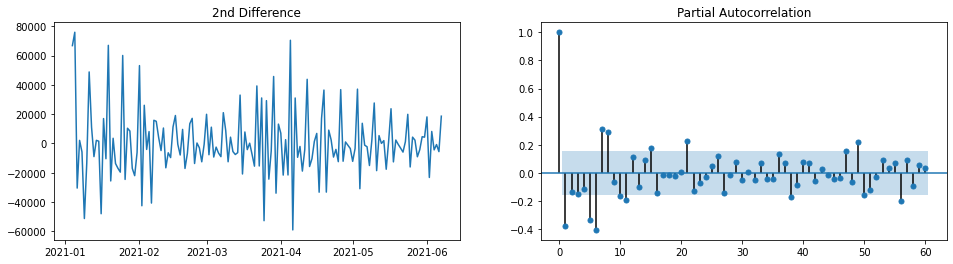

In [85]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#acf
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(Covid_stat)
ax1.set_title("2nd Difference")
plot_acf(Covid_stat, lags=60, ax=ax2)
plt.show()
#pacf
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(Covid_stat)
ax1.set_title("2nd Difference")
plot_pacf(Covid_stat, lags=60, ax=ax2)
plt.show()


In [86]:
# we used ndiffs to have the number for Daily_confirmed
ndiffs(Covid_merg.Daily_confirmed, test="adf")
# d= 1  (number of differencing require to make the series stationary). Is the same result we get when analysing acf plot.
#for the partial autocorrelation we can see that the lag number 1 first stand above the significant line(blue line). 1 can be used as the p term.
#q value in this case lag 1 is first lag above the significant line

1

In [87]:
Covid_merg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2021-01-02 to 2021-06-07
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Daily_confirmed         157 non-null    float64
 1   Daily_death             157 non-null    float64
 2   Daily First Difference  156 non-null    float64
 3   Daily 2nd  Difference   155 non-null    float64
dtypes: float64(4)
memory usage: 6.1 KB


In [88]:
p = Covid_merg.drop(columns=['Daily_death','Daily_death',	'Daily First Difference','Daily 2nd  Difference'])

In [89]:
p.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2021-01-02 to 2021-06-07
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Daily_confirmed  157 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [90]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [174]:
#cross validation
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 3)
rmse = []
mse = []
mae = []
for train_index, test_index in tscv.split(p):
    cv_train, cv_test = p.iloc[train_index], p.iloc[test_index]
    models = ARIMA(cv_train, order = (1,1,1) ).fit()
    predictions = models.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    mse.append(mean_squared_error(true_values, predictions))
    mae.append(mean_absolute_error(true_values, predictions))
print("RMSE: {}".format(np.mean(rmse)))
print( f"MSE: {np.mean(mse)}")
print( f"MAE: {np.mean(mae)}")

RMSE: 57158.10304941101
MSE: 3568687291.0108337
MAE: 55324.0285274836


In [ ]:
# Calcuate metrics
score_mae = mean_absolute_error(true_values, predictions)
score_rmse = math.sqrt(mean_squared_error(true_values, predictions))
score_mse = mean_squared_error(true_values, predictions)
print( f"RMSE: {score_rmse}")
print( f"MSE: {score_mse}")
print( f"MAE: {score_mae}")

RMSE: 26991.760292135452
MSE: 728555123.6681001
MAE: 25204.643600041476


In [95]:
# fit Model
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Daily_confirmed   No. Observations:                  117
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1312.054
Method:                       css-mle   S.D. of innovations          17926.888
Date:                Mon, 05 Jul 2021   AIC                           2632.109
Time:                        18:00:27   BIC                           2643.157
Sample:                    01-03-2021   HQIC                          2636.594
                         - 04-29-2021                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1816.6379    701.543     -2.589      0.010   -3191.638    -441.638
ar.L1.D.Daily_confirmed     0.5182      0.114      4.530      0.000       0.294       0.742
ma.L1.D.Daily_confirmed    -0.8015      0.061    -13.088      0.000      -0.922      -0.681
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9296           +0.0000j            1.9296            0.0000
MA.1            1.2476           +0.0000j            1.2476            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
print(model_fit.aic)

2936.5203475509006


In [157]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [101]:
p['Date'] = p.index-p.index[0]
p['Date'] = p['Date'].dt.days
train_m=p.iloc[:int(p.shape[0]*0.80)]
valid_m=p.iloc[int(p.shape[0]*0.80):]

In [102]:
train_m

,Daily_confirmed,Date
Date,,
2021-01-02,300462.0,0
2021-01-03,208853.0,1
2021-01-04,184005.0,2
2021-01-05,235042.0,3
2021-01-06,255637.0,4
...,...,...
2021-05-02,29404.0,120
2021-05-03,50492.0,121
2021-05-04,40716.0,122


In [103]:
#support Vector machine
#Intializing SVR Model
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.001)
rmse = []
mse = []
mae = []
svm.fit(np.array(train_m["Date"]).reshape(-1,1), np.array(train_m['Daily_confirmed']).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_m["Date"]).reshape(-1,1))
rmse.append(np.sqrt(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_svm)))
mse.append(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_svm))
mae.append(mean_absolute_error(valid_m["Daily_confirmed"],prediction_valid_svm))
print("RMSE: ",np.sqrt(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_svm)))
print("MSE: ", (mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_svm)))
print("MAE: ", (mean_absolute_error(valid_m["Daily_confirmed"],prediction_valid_svm)))

RMSE:  60031.89965086421
MSE:  3603828975.69143
MAE:  49309.401993348205


In [104]:
#Linear regression
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(np.array(train_m["Date"]).reshape(-1,1), np.array(train_m['Daily_confirmed']).reshape(-1,1))
prediction_valid_lin_reg= lin_reg.predict(np.array(valid_m["Date"]).reshape(-1,1))
rmse.append(np.sqrt(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg)))
mse.append(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg))
mae.append(mean_absolute_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg))
print("RMSE: ",np.sqrt(mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg)))
print("MSE: ", (mean_squared_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg)))
print("MAE: ", (mean_absolute_error(valid_m["Daily_confirmed"],prediction_valid_lin_reg)))

RMSE:  37642.34114543902
MSE:  1416945846.9096117
MAE:  36731.526493471596


# Model Analysis for Daily death

## *1) Arima*

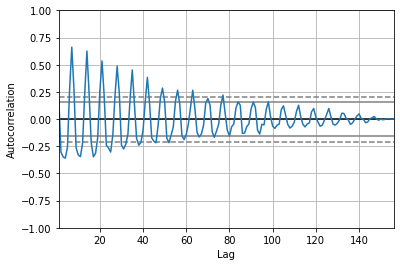

In [149]:
# Arima
#Autocorrelation analysis
autocorrelation_plot(diff.dropna())
pyplot.show()

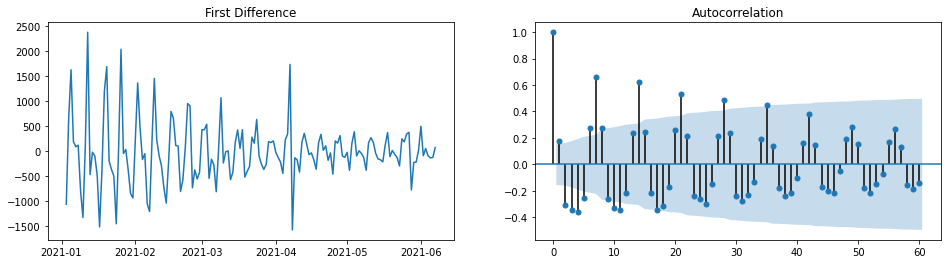

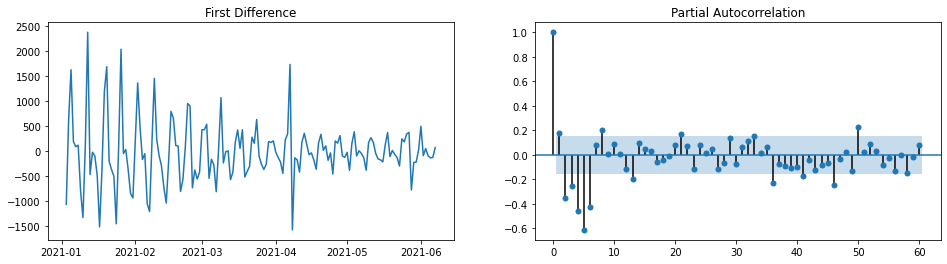

In [150]:
#acf
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff.dropna())
ax1.set_title("First Difference")
plot_acf(diff.dropna(), lags=60, ax=ax2)
plt.show()
#pacf
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff.dropna())
ax1.set_title("First Difference")
plot_pacf(diff.dropna(), lags=60, ax=ax2)
plt.show()

In [151]:
# we used ndiffs to have the number for Daily_confirmed
ndiffs(Covid_merg.Daily_death, test="adf")
# d= 1
# from the plot we can see that p= 1 and q= 1

1

In [152]:
df_death = Covid_merg.drop(columns=['Daily_confirmed',	'Daily First Difference','Daily 2nd  Difference'])

In [153]:
df_death

,Daily_death
Date,
2021-01-02,2512.0
2021-01-03,1454.0
2021-01-04,2090.0
2021-01-05,3713.0
2021-01-06,3906.0
...,...
2021-06-03,601.0
2021-06-04,510.0
2021-06-05,376.0


In [127]:
#cross vaidation
tscv = TimeSeriesSplit(n_splits = 3)
rmse = []
mse = []
mae = []
for train_index, test_index in tscv.split(df_death):
    cv_train, cv_test = df_death.iloc[train_index], df_death.iloc[test_index]
    model = ARIMA(cv_train, order = (0,1,1) ).fit()
    predictions = model.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    mse.append(mean_squared_error(true_values, predictions))
    mae.append(mean_absolute_error(true_values, predictions))
print("RMSE: {}".format(np.mean(rmse)))
print( f"MSE: {np.mean(mse)}")
print( f"MAE: {np.mean(mae)}")
print("RMSE: {}".format(rmse))
print( f"MSE: {mse}")
print( f"MAE: {mae}")

RMSE: 1135.118394158939
MSE: 1531017.1885363592
MAE: 1040.9759609605935
RMSE: [1806.4236918416063, 960.0802765561436, 638.8512140790674]
MSE: [3263166.5544466586, 921754.1374321213, 408130.8737302984]
MAE: [1658.0710375108126, 876.5387843882804, 588.3180609826879]


In [ ]:
#cross vaidation
tscv = TimeSeriesSplit(n_splits = 3)
rmse = []
mse = []
mae = []
for train_index, test_index in tscv.split(df_death):
    cv_train, cv_test = df_death.iloc[train_index], df_death.iloc[test_index]
    model = ARIMA(cv_train, order = (1,1,1) ).fit()
    predictions = model.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    mse.append(mean_squared_error(true_values, predictions))
    mae.append(mean_absolute_error(true_values, predictions))
print("RMSE: {}".format(np.mean(rmse)))
print( f"MSE: {(mse)}")
print( f"MAE: {(mae)}")

2) *Support Vector Machine*

In [125]:
#Splitting the data and creating a Day column
df_death['Days'] = df_death.index-p.index[0]
df_death['Days'] = df_death['Days'].dt.days
train_ml=df_death.iloc[:int(df_death.shape[0]*0.80)]
valid_ml=df_death.iloc[int(df_death.shape[0]*0.80):]

In [126]:
df_death

,Daily_death,Days
Date,,
2021-01-02,2512.0,0
2021-01-03,1454.0,1
2021-01-04,2090.0,2
2021-01-05,3713.0,3
2021-01-06,3906.0,4
...,...,...
2021-06-03,601.0,152
2021-06-04,510.0,153
2021-06-05,376.0,154


In [136]:
#initializing svr
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.001)
rmse = []
mae = []
mse = []
svm.fit(np.array(train_ml["Days"]).reshape(-1,1), np.array(train_ml['Daily_death']).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_ml["Days"]).reshape(-1,1))
rmse.append(np.sqrt(mean_squared_error(valid_ml["Daily_death"],prediction_valid_svm)))
mse.append(mean_squared_error(valid_ml["Daily_death"],prediction_valid_svm))
mae.append(mean_absolute_error(valid_ml["Daily_death"],prediction_valid_svm))
print("RMSE: ",np.sqrt(mean_squared_error(valid_ml["Daily_death"],prediction_valid_svm)))
print("MSE: ", (mean_squared_error(valid_ml["Daily_death"],prediction_valid_svm)))
print("MAE: ", (mean_absolute_error(valid_ml["Daily_death"],prediction_valid_svm)))

RMSE:  3600.886426236662
MSE:  12966383.05465544
MAE:  3190.698492396435


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



3) *Linear regression*

In [138]:
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(np.array(train_ml["Days"]).reshape(-1,1), np.array(train_ml['Daily_death']).reshape(-1,1))
prediction_valid_lin =lin_reg.predict(np.array(valid_ml["Days"]).reshape(-1,1))
rmse.append(np.sqrt(mean_squared_error(valid_ml["Daily_death"],prediction_valid_lin)))
mse.append(mean_squared_error(valid_ml["Daily_death"],prediction_valid_lin))
mae.append(mean_absolute_error(valid_ml["Daily_death"],prediction_valid_lin))
print("RMSE: ",np.sqrt(mean_squared_error(valid_ml["Daily_death"],prediction_valid_lin)))
print("MSE: ", (mean_squared_error(valid_ml["Daily_death"],prediction_valid_lin)))
print("MAE: ", (mean_absolute_error(valid_ml["Daily_death"],prediction_valid_lin)))

RMSE:  852.4498494122188
MSE:  726670.7457629144
MAE:  795.3475483870973


In [160]:
#check p,d,q
#1) daily death
stepwise_fit = auto_arima(df_death['Daily_death'], trace =True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2441.447, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2439.308, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2434.772, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2439.533, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2434.335, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2367.392, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2421.851, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2359.020, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2414.313, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2329.513, Time=0.56 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2381.625, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2297.929, Time=0.57 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2313.980, Time=0.46 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(5, 1, 1)   Log Likelihood               -1140.964
Date:                Tue, 06 Jul 2021   AIC                           2297.929
Time:                        00:06:40   BIC                           2322.327
Sample:                             0   HQIC                          2307.838
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -47.5690     24.075     -1.976      0.048     -94.756      -0.382
ar.L1         -0.0330      0.074     -0.445      0.656      -0.178       0.112
ar.L2         -0.5420      0.054    -10.002      0.000      -0.648      -0.436
ar.L3         -0.3672      0.088     -4.170      0.000      -0.540      -0.195
ar.L4         -0.3925      0.065     -6.053      0.000      -0.520      -0.265
ar.L5         -0.5364      0.079     -6.779      0.000      -0.691      -0.381
ma.L1         -0.3955      0.091     -4.369      0.000      -0.573      -0.218
sigma2      1.233e+05   9413.987     13.095      0.000    1.05e+05    1.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               121.68
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
#cross vaidation
tscv = TimeSeriesSplit(n_splits = 3)
rmse = []
mse = []
mae = []
for train_index, test_index in tscv.split(df_death):
    cv_train, cv_test = df_death.iloc[train_index], df_death.iloc[test_index]
    model_2 = ARIMA(cv_train, order = (5,1,1) ).fit()
    predictions = model_2.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    mse.append(mean_squared_error(true_values, predictions))
    mae.append(mean_absolute_error(true_values, predictions))
print("RMSE: {}".format(np.mean(rmse)))
print( f"MSE: {np.mean(mse)}")
print( f"MAE: {np.mean(mae)}")
print("RMSE: {}".format(rmse))
print( f"MSE: {mse}")
print( f"MAE: {mae}")

RMSE: 1125.6864688695039
MSE: 1518566.4516014142
MAE: 1046.9684351559506
RMSE: [1816.5440400998907, 918.5743500501856, 641.941016458435]
MSE: [3299832.2496224334, 843778.8365701209, 412088.2686116887]
MAE: [1691.793186447973, 849.0757579144492, 600.0363611054294]


In [165]:
#2) Daily confirmed
stepwise_fit_2 = auto_arima(p['Daily_confirmed'], trace =True, suppress_warnings=True)
stepwise_fit_2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3486.533, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3483.487, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3465.812, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3459.538, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3483.309, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3462.170, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3477.580, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3481.751, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3459.694, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.819 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1726.769
Date:                Tue, 06 Jul 2021   AIC                           3459.538
Time:                        00:18:40   BIC                           3468.688
Sample:                             0   HQIC                          3463.254
                                - 157                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1557.5397    798.703     -1.950      0.051   -3122.969       7.889
ma.L1         -0.2742      0.038     -7.306      0.000      -0.348      -0.201
sigma2      2.115e+08      0.008   2.71e+10      0.000    2.11e+08    2.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.96   Jarque-Bera (JB):                12.72
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+26. Standard errors may be unstable.
"""

In [173]:
#cross vaidation
tscv = TimeSeriesSplit(n_splits = 3)
rmse = []
mse = []
mae = []
for train_index, test_index in tscv.split(p):
    cv_train, cv_test = p.iloc[train_index], p.iloc[test_index]
    model_4 = ARIMA(cv_train, order = (1,1,1)).fit()
    predictions = model_4.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    mse.append(mean_squared_error(true_values, predictions))
    mae.append(mean_absolute_error(true_values, predictions))
print("RMSE: {}".format(np.mean(rmse)))
print( f"MSE: {np.mean(mse)}")
print( f"MAE: {np.mean(mae)}")
print("RMSE: {}".format(rmse))
print( f"MSE: {mse}")
print( f"MAE: {mae}")

RMSE: 57158.10304941101
MSE: 3568687291.0108337
MAE: 55324.0285274836
RMSE: [70537.95899248638, 68306.12371028423, 32630.226445462453]
MSE: [4975603658.825691, 4665726536.324654, 1064731677.8821572]
MAE: [69097.09252269774, 67027.66834741864, 29847.324712334408]
